In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

In [3]:
class NeuralNetwork(object):
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.i_nodes = input_nodes
        self.h_nodes = hidden_nodes
        self.o_nodes = output_nodes
        self.lr = learning_rate
        
        self.ih_weights = np.random.uniform(.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes))
        self.ho_weights = np.random.uniform(.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))
        
        self.activation_func = lambda x: expit(x)
        
    #forward propagation and back propagation
    def train(self, input_list, true_list):
        
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(true_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.ih_weights, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.ho_weights, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        #back propagation
        output_errors = targets - final_outputs
        hidden_errors =  np.dot(self.ho_weights.T, output_errors)
        
        self.ho_weights += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), \
                                            np.transpose(hidden_outputs))
        self.ih_weights += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), \
                                           np.transpose(inputs))
        
        
        pass
    
    
    def query(self, input_list):
        
        inputs = np.array(input_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.ih_weights, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.ho_weights, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs
        
        

In [4]:
INPUT_NODES = 3
HIDDEN_NODES = 3
OUTPUT_NODES = 3
learning_rate = 0.5


nn = NeuralNetwork(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, learning_rate)

In [5]:
nn.query([1.1, 2.1, 3.2])

array([[0.64452572],
       [0.69194175],
       [0.67685968]])

In [6]:
test_x = [
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 0]
]

test_y = [
    [1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
]

nn.train(test_x, test_y)

In [7]:
need_length = 1000

with open('data/mnist_test.csv', 'r') as f:
    mnist_y = []
    mnist_x = []
    for i in range(need_length):
        row = f.readline().split(',')
        mnist_y.append(row[0])
        mnist_x.append(row[1:])

label is 7
pic show below:


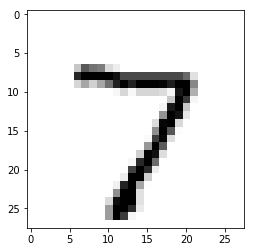

In [8]:
label, image_arr = mnist_y[0], np.array(mnist_x[0], dtype=np.float).reshape((28, 28))

print('label is {0}\npic show below:'.format(label))
plt.imshow(image_arr, cmap='Greys', interpolation='None')

In [9]:
INPUT_NODES = 28*28
HIDDEN_NODES = 100
OUTPUT_NODES = 10
learning_rate = 0.2

EPOCHS = 5

train_size = 900
test_size = 100

mnist_nn = NeuralNetwork(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, learning_rate)

for epoch in range(EPOCHS):
    for i in range(train_size):

        inputs = np.array(mnist_x[i], dtype=np.float) / 255 * 0.99 + 0.01
        label = np.zeros(OUTPUT_NODES) + 0.01
        label[int(mnist_y[i])] = 0.99

        mnist_nn.train(inputs, label)

label is 9
pic show below:


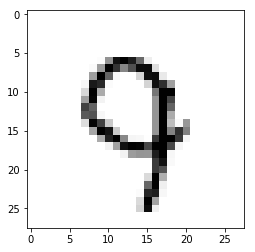

In [10]:
label, image_arr = mnist_y[-1], np.array(mnist_x[-1], dtype=np.float).reshape((28, 28))

print('label is {0}\npic show below:'.format(label))
plt.imshow(image_arr, cmap='Greys', interpolation='None')

In [11]:
mnist_nn.query(np.array(mnist_x[-1], dtype=np.float) / 255 * 0.99 + 0.01)

array([[0.0189763 ],
       [0.03566148],
       [0.05092522],
       [0.0046191 ],
       [0.18370404],
       [0.01526615],
       [0.01750005],
       [0.26150654],
       [0.03395027],
       [0.65538976]])

In [12]:
def test_score():
    err = 0
    for i in range(test_size):
        target = int(mnist_y[-i])
        pred_prob = mnist_nn.query(np.array(mnist_x[-i], dtype=np.float) / 255 * 0.99 + 0.01)
        pred = np.argmax(pred_prob)
        
        if target != pred:
            print('true {0}, pred {1}'.format(target, pred))
            err += 1
    
    return err, err/test_size

print('error (numbers, rate) : ({0})'.format(test_score()))

true 8, pred 9
true 2, pred 0
true 2, pred 7
true 3, pred 2
true 2, pred 3
true 9, pred 7
true 6, pred 0
true 3, pred 5
true 1, pred 3
true 5, pred 3
true 8, pred 9
true 3, pred 7
true 6, pred 1
true 2, pred 0
true 3, pred 5
true 8, pred 5
true 5, pred 8
true 4, pred 9
true 2, pred 7
true 8, pred 5
error (numbers, rate) : ((20, 0.2))


In [13]:
def train_test_split(X, y, rate=0.3):
    
    test_idx = np.random.choice(len(y), replace=False)
    
    pass

In [14]:
def cal_accuration(target, pred):
    err = 0
    sz = len(target)
    
    for idx in range(sz):
        if target[idx] != pred[idx]:
            err += 1
    
    return err, err/sz

In [15]:
def data_to_arr():
    arr = []
    
    for i in range(train_size+test_size):

        inputs = np.array(mnist_x[i], dtype=np.float) / 255 * 0.99 + 0.01
        arr.append(inputs)
    
    return np.array(arr)


data = data_to_arr()

In [18]:
from sklearn.neighbors import KNeighborsClassifier


def cmp_skl_knn(train_X, train_y, test_X, test_y):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(train_X, train_y)
    
    pred_y = model.predict(test_X)
    
    err, err_rate = cal_accuration(test_y, pred_y)
    
    print("error {0}, error rate {1}".format(err, err_rate))
    
    
cmp_skl_knn(data[:train_size, :], mnist_y[:train_size], data[-test_size-1:, :], mnist_y[-test_size-1:])

error 17, error rate 0.16831683168316833


In [ ]:
# -*- coding: utf-8 -*-
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()